In [1]:
!pip install qiskit qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.0 MB/s eta 0:00:00


In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def qft_rotations(qc, n):
    """Apply QFT rotations recursively on the first n qubits."""
    if n == 0:
        return qc
    n -= 1
    qc.h(n)
    for qubit in range(n):
        qc.cp(np.pi / 2**(n - qubit), qubit, n)
    qft_rotations(qc, n)
    return qc

In [4]:
def swap_registers(qc, n):
    """Swap qubits to reverse their order."""
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    return qc

In [5]:
def qft_circuit(n):
    """Builds an n-qubit Quantum Fourier Transform circuit."""
    qc = QuantumCircuit(n)
    qft_rotations(qc, n)
    swap_registers(qc, n)
    qc.name = "QFT"
    return qc

In [6]:
def run_qft(n):
    """Executes QFT circuit and displays Bloch sphere representation."""
    qc = qft_circuit(n)

    # Create a simulator and save the statevector explicitly
    simulator = AerSimulator(method='statevector')
    qc.save_statevector()

    # Transpile and run
    compiled = transpile(qc, simulator)
    result = simulator.run(compiled).result()

    # Retrieve statevector safely
    statevector = result.data(0)["statevector"]

    # Display results
    plot_bloch_multivector(statevector)
    plt.show()
    print(qc.draw(output='text'))

if __name__ == "__main__":
    n_qubits = 3
    print(f"Running Quantum Fourier Transform on {n_qubits} qubits...")
    run_qft(n_qubits)

Running Quantum Fourier Transform on 3 qubits...
                                          ┌───┐    statevector 
q_0: ──────■──────────────────────■───────┤ H ├─X───────░──────
           │                ┌───┐ │P(π/2) └───┘ │       ░      
q_1: ──────┼────────■───────┤ H ├─■─────────────┼───────░──────
     ┌───┐ │P(π/4)  │P(π/2) └───┘               │       ░      
q_2: ┤ H ├─■────────■───────────────────────────X───────░──────
     └───┘                                              ░      


# TASK

Task 1 - Vary the number of qubits

In [9]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=f7ad9777ed52f225ec02306bd566f2ff91c57c5479e0a31570c2df3796f40c87
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [12]:
import pylatexenc
print("pylatexenc installed successfully!")


pylatexenc installed successfully!


In [14]:
from qiskit import QuantumCircuit

def qft_rotations(qc, n):
    if n == 0:
        return qc
    n -= 1
    qc.h(n)
    for qubit in range(n):
        qc.cp(np.pi / 2**(n - qubit), qubit, n)
    qft_rotations(qc, n)
    return qc

def swap_registers(qc, n):
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    return qc

def qft_circuit(n):
    qc = QuantumCircuit(n)
    qft_rotations(qc, n)
    swap_registers(qc, n)
    qc.name = "QFT"
    return qc

# Test QFT for 2, 3, 4 qubits
for n_qubits in [2, 3, 4]:
    print(f"\n--- QFT Circuit with {n_qubits} qubits ---")
    qc = qft_circuit(n_qubits)
    # Text-based circuit (no matplotlib needed)
    print(qc.draw(output='text'))



--- QFT Circuit with 2 qubits ---
                   ┌───┐   
q_0: ──────■───────┤ H ├─X─
     ┌───┐ │P(π/2) └───┘ │ 
q_1: ┤ H ├─■─────────────X─
     └───┘                 

--- QFT Circuit with 3 qubits ---
                                          ┌───┐   
q_0: ──────■──────────────────────■───────┤ H ├─X─
           │                ┌───┐ │P(π/2) └───┘ │ 
q_1: ──────┼────────■───────┤ H ├─■─────────────┼─
     ┌───┐ │P(π/4)  │P(π/2) └───┘               │ 
q_2: ┤ H ├─■────────■───────────────────────────X─
     └───┘                                        

--- QFT Circuit with 4 qubits ---
                                                                          ┌───┐»
q_0: ──────■───────────────────────────────■──────────────────────■───────┤ H ├»
           │                               │                ┌───┐ │P(π/2) └───┘»
q_1: ──────┼────────■──────────────────────┼────────■───────┤ H ├─■─────────X──»
           │        │                ┌───┐ │P(π/4)  │P(π/2) └───┘         


Task 2 - Inverse QFT




In [16]:
from qiskit import QuantumCircuit

def inverse_qft_circuit(n):
    qc = QuantumCircuit(n)

    # Swap qubits
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)

    # Apply inverse rotations recursively
    def inv_rotations(qc, n):
        if n == 0:
            return qc
        n -= 1
        inv_rotations(qc, n)
        for qubit in reversed(range(n)):
            qc.cp(-np.pi / 2**(n - qubit), qubit, n)
        qc.h(n)
        return qc

    inv_rotations(qc, n)
    qc.name = "IQFT"
    return qc

# Test inverse QFT for 3 qubits
qc_iqft = inverse_qft_circuit(3)
# Text-based circuit visualization
print(qc_iqft.draw(output='text'))


        ┌───┐                                        
q_0: ─X─┤ H ├─■────────────────────────■─────────────
      │ └───┘ │P(-π/2) ┌───┐           │             
q_1: ─┼───────■────────┤ H ├─■─────────┼─────────────
      │                └───┘ │P(-π/2)  │P(-π/4) ┌───┐
q_2: ─X──────────────────────■─────────■────────┤ H ├
                                                └───┘


Task 3 -Integration with Phase Estimation

In [18]:
!pip install qiskit qiskit-aer


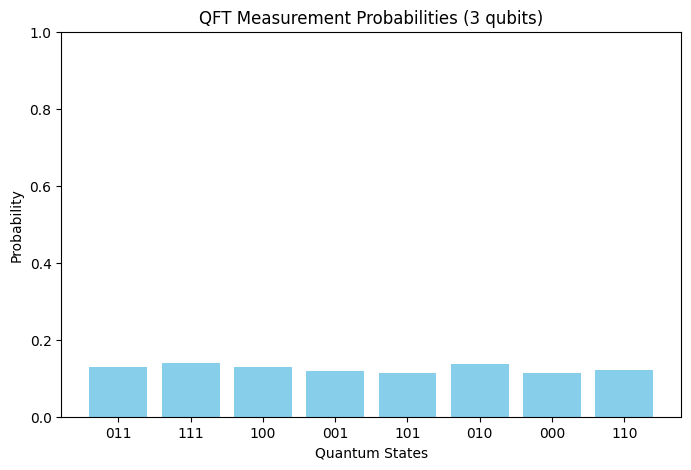

Normalized Probabilities:
011: 0.128
111: 0.141
100: 0.129
001: 0.118
101: 0.113
010: 0.137
000: 0.114
110: 0.120


In [25]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt

# QFT helper functions
def qft_rotations(qc, n):
    if n == 0:
        return qc
    n -= 1
    qc.h(n)
    for qubit in range(n):
        qc.cp(np.pi / 2**(n - qubit), qubit, n)
    qft_rotations(qc, n)
    return qc

def swap_registers(qc, n):
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    return qc

def qft_circuit(n):
    qc = QuantumCircuit(n)
    qft_rotations(qc, n)
    swap_registers(qc, n)
    return qc

# Run QFT, measure, and plot using matplotlib
def run_qft_with_matplotlib(n):
    qc = qft_circuit(n)
    qc.measure_all()

    simulator = AerSimulator()
    compiled = transpile(qc, simulator)
    result = simulator.run(compiled, shots=1024).result()
    counts = result.get_counts()

    # Normalize counts to probabilities
    total_shots = sum(counts.values())
    probabilities = {state: count/total_shots for state, count in counts.items()}

    # Plot using matplotlib
    states = list(probabilities.keys())
    probs = list(probabilities.values())

    plt.figure(figsize=(8,5))
    plt.bar(states, probs, color='skyblue')
    plt.xlabel('Quantum States')
    plt.ylabel('Probability')
    plt.title(f'QFT Measurement Probabilities ({n} qubits)')
    plt.ylim(0,1)
    plt.show()

    print("Normalized Probabilities:")
    for state, prob in probabilities.items():
        print(f"{state}: {prob:.3f}")

# Example: 3 qubits
run_qft_with_matplotlib(3)


Task 4 - Measure Output States

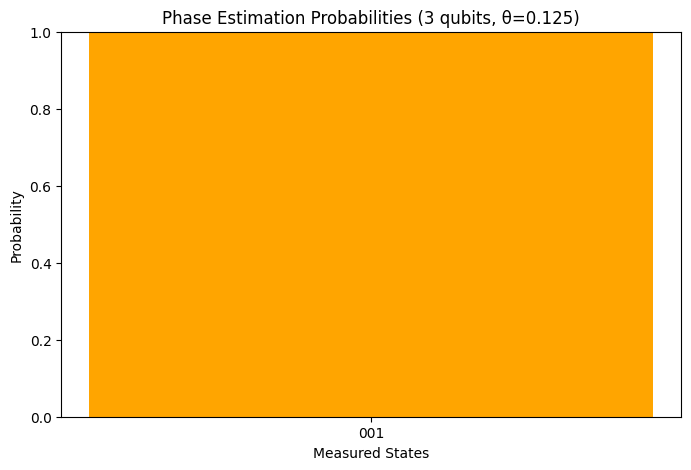

Normalized Probabilities:
001: 1.000


In [28]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
import numpy as np

# Inverse QFT for Phase Estimation
def inverse_qft_circuit(n):
    qc = QuantumCircuit(n)

    # Swap qubits
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)

    # Apply inverse rotations recursively
    def inv_rotations(qc, n):
        if n == 0:
            return qc
        n -= 1
        inv_rotations(qc, n)
        for qubit in reversed(range(n)):
            qc.cp(-np.pi / 2**(n - qubit), qubit, n)
        qc.h(n)
        return qc

    inv_rotations(qc, n)
    return qc

# Phase Estimation Example
def phase_estimation_example_matplotlib(n, theta):
    qc = QuantumCircuit(n + 1, n)

    # Initialize counting qubits in |+> and target qubit in |1>
    for q in range(n):
        qc.h(q)
    qc.x(n)

    # Apply controlled-U operations (U = e^{2πiθ})
    for q in range(n):
        qc.cp(2 * np.pi * theta * 2**q, q, n)

    # Apply inverse QFT on counting qubits
    iqft = inverse_qft_circuit(n)
    qc.append(iqft.to_gate(), range(n))

    # Measure counting qubits
    qc.measure(range(n), range(n))

    # Simulate
    simulator = AerSimulator()
    compiled = transpile(qc, simulator)
    result = simulator.run(compiled, shots=1024).result()
    counts = result.get_counts()

    # Normalize counts to probabilities
    total_shots = sum(counts.values())
    probabilities = {state: count/total_shots for state, count in counts.items()}

    # Plot with matplotlib
    states = list(probabilities.keys())
    probs = list(probabilities.values())

    plt.figure(figsize=(8,5))
    plt.bar(states, probs, color='orange')
    plt.xlabel("Measured States")
    plt.ylabel("Probability")
    plt.title(f"Phase Estimation Probabilities ({n} qubits, θ={theta})")
    plt.ylim(0,1)
    plt.show()

    print("Normalized Probabilities:")
    for state, prob in probabilities.items():
        print(f"{state}: {prob:.3f}")

# Run example
phase_estimation_example_matplotlib(3, 0.125)


Task 5 - Circuit Visualization

In [29]:
# Install pylatexenc if not already installed
!pip install pylatexenc


In [31]:
qc = qft_circuit(3)
print("QFT Circuit (3 qubits):\n")
print(qc.draw(output='text'))


QFT Circuit (3 qubits):

                                          ┌───┐   
q_0: ──────■──────────────────────■───────┤ H ├─X─
           │                ┌───┐ │P(π/2) └───┘ │ 
q_1: ──────┼────────■───────┤ H ├─■─────────────┼─
     ┌───┐ │P(π/4)  │P(π/2) └───┘               │ 
q_2: ┤ H ├─■────────■───────────────────────────X─
     └───┘                                        
